# Analysis of the Ford Go Bike Trip Data
### by
## Alex Mogengo

# Explanatory Data Visualization
In this section, I am going to make visualization to provide more insights and answer questions regarding the dataset provided.

# Summary
- Most of the bike users were male, comprising of over 86% of the total users. Most of these users are subscribers and the the rest customers.
<br>
- Further analysis into the age distribution shows that most users were between ages 25 to 45 years. As the age increases the number of bike users also significantly decreases.
<br>
- Most of the users start their bike trips at two peak times in a day: 8 A.M and 5PM. This is the duration where there is highest activity in starting and ending trips. 
<br>
- Lowest activity in bike usage (starting and ending trips) is experienced between 9PM and 6AM. There is moderate bike usage between 10AM and 3PM before the demand starts rising.
<br>
- The younger users (24-45) years old have the highest trip duration from the analysis and then the duration decreases with increase in age.


## Investigation Overview
-In this analysis, my aim was to look into the various factors that afected the trip duration, distance covered and the preferred stations. 
<br>
-I also wanted to analyze the demographics in terms of the gender of the bike users, their status and these might affected their trip.
## Dataset Overview
-The dataset consists of 183216 rows with 16 descritive columns. The main features include the trip duration, start and end times, start and end stations, the gender and user type of the rides and their year of birth.
<br>
-Crucial missing information on the date of birth and station ID led to the dropping of 8265 data points.

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Change the directory
os.chdir('D:/Learning/Data Science/UDACITY/DATA VISUALIZATION/Project')

In [2]:
# load in the dataset into a pandas dataframe
go_bike = pd.read_csv('go_bike.csv')

### Composition of the bike users by gender
- The male gender users were the highest
- Female users followed with a significant of users not identifying their gender.

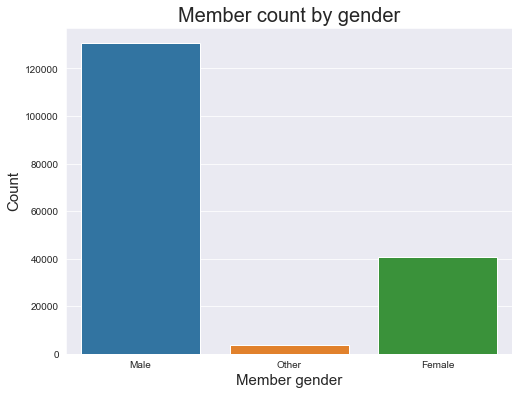

In [23]:
# Use bar chart to represent this info
plt.figure(figsize = (8,6))
base_color = sns.color_palette()[0]

sns.countplot(data = go_bike,
             x = 'member_gender')
plt.xlabel('Member gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Member count by gender', fontsize = 20)
plt.show();

#### Calculate the distance
- Distance between the start and end stations using the given latitudes and longitudes

In [4]:
## Create a distance covered column
## Will use theHaver Formula and and also use distancemetric & radians packages
# import the packages
from sklearn.neighbors import DistanceMetric
from math import radians

# define the haverseine_vectorize function to take the stand & end coordinates for the trips
def haversine_vectorize(start_station_longitude, start_station_latitude, end_station_longitude, end_station_latitude):
    start_station_longitude, start_station_latitude, end_station_longitude, end_station_latitude = map(np.radians, [start_station_longitude, start_station_latitude, end_station_longitude, end_station_latitude])
    
    # form the new longitudes from the the subtractions of the start and end
    newlon = end_station_longitude - start_station_longitude
    newlat = end_station_latitude - start_station_latitude
    
    # define the haver formula
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(start_station_latitude) * np.cos(end_station_latitude) * np.sin(newlon/2.0)**2
    
    # calculate the distance in metres
    distance = 2* np.arcsin(np.sqrt(haver_formula))
    metres = 6367 * distance *1000
    
    return metres

# add a new column to have the distance covered by the bike users during the trips
go_bike['distance_covered'] = haversine_vectorize(go_bike['start_station_longitude'], go_bike['start_station_latitude'], go_bike['end_station_longitude'], go_bike['end_station_latitude'])

#test
go_bike[['distance_covered']].head(4)

,distance_covered
0,544.366511
1,1741.904804
2,2702.847096
3,260.574841


### Average distance covered of the users
- High number of the bike users covered a distance of less than 2500 meters.
- The distribution of the distance covered is right skewed, less users covered long distances
- Most users averages at 1680 meters

The average distance covered by the bike users is 1689.5778139628178 metres.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


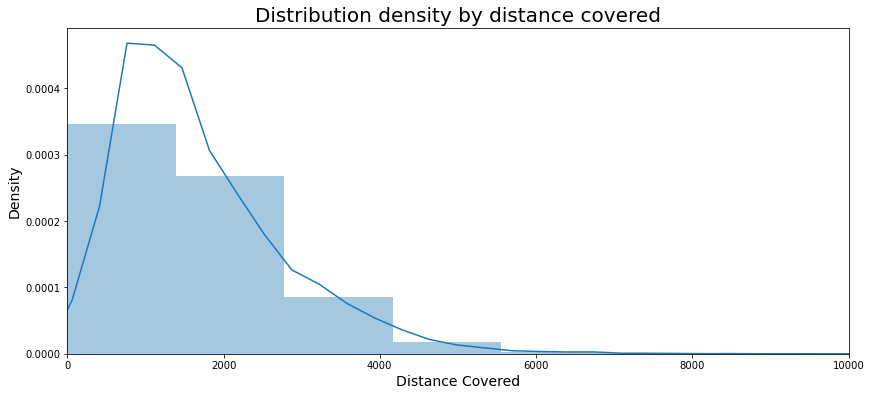

In [5]:
# print the average distance travelled by the users
mean_distance = go_bike['distance_covered'].mean()
print(f'The average distance covered by the bike users is {mean_distance} metres.')

# use distplot to show distribution density of the users by distance
plt.figure(figsize = (14,6))
sns.distplot(go_bike['distance_covered'])
plt.xlim(0, 10000)
plt.xlabel('Distance Covered', fontsize=14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution density by distance covered', fontsize = 20);

### User average speed distribution
- The distribution of the users' average speed is normal, with the highest number of users averafing at 3 m/s.
- A few users rode their bikes below 2 m/s
- Max average speed by the users was about 6.8 m/s.

The average speed by the all the users in was 2.9919416501581 m/s.


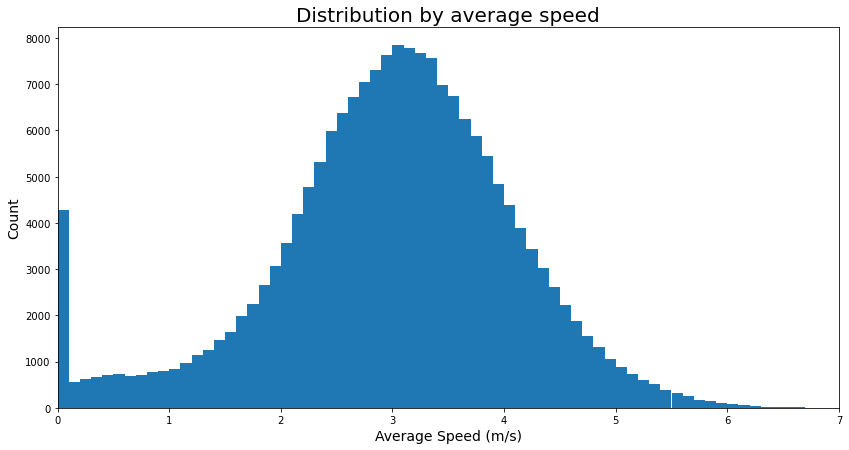

In [6]:
# plot a hisstogram
average_speed = go_bike['avg_speed'].mean()
print(f'The average speed by the all the users in was {average_speed} m/s.')

plt.figure(figsize =(14,7))
#define no of bins
bins = np.arange(0, go_bike['avg_speed'].max()+0.1, 0.1)
# show the distribution of the the average speed
plt.hist(data = go_bike,
        x = 'avg_speed',
        bins = bins)
plt.xlabel('Average Speed (m/s)', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xlim([0, 7])
plt.title('Distribution by average speed', fontsize = 20);

### Age distribution of the users
- The age distribution is almost unimodal, with skewness to the right.
<br>
- Most of the users are aged between 25 to 45 years with the peak at 30 to 40 years
<br>
- Average bike user age is 37 years
- The youngest bike users were 21 years  old.

The average age of the users in 37.22932103308962 years.
The youngest bike user was 21 years old.


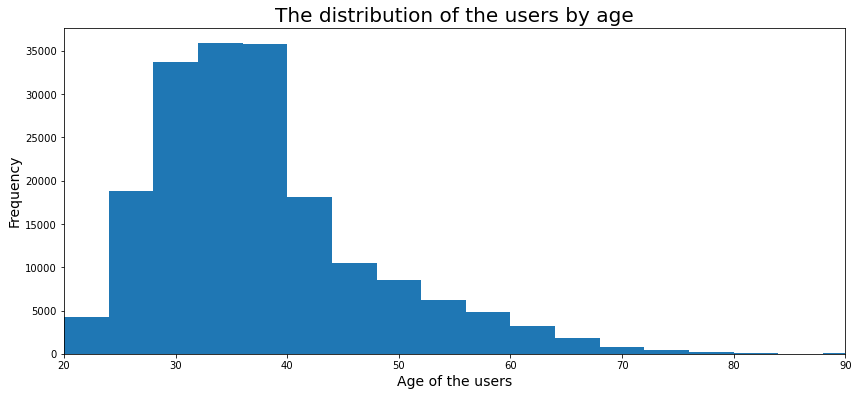

In [7]:
from datetime import datetime, date
today = date.today()


# Add a column for age
go_bike['age'] = today.year - go_bike['member_birth_year']

#adjust the size of the figure
plt.figure(figsize = (14,6))

# Average years of the users
average_age = go_bike['age'].mean()
youngest_user_age = go_bike['age'].min()
oldest_user_age = go_bike['age'].max()
print(f'The average age of the users in {average_age} years.')
print(f'The youngest bike user was {youngest_user_age} years old.')
# plot a histogram to show the distribution of years
age_bins = np.arange(20, go_bike['age'].max()+4, 4)
plt.hist(data = go_bike,
        x = 'age',
        bins = age_bins)
# limit the age to about 90 years to zoom in
plt.xlim([20,90])
plt.xlabel('Age of the users', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('The distribution of the users by age', fontsize=20)
plt.show();

### Time which most people start their trips
- Most of the users start their trips at 8AM and 5PM
- Lowest traffic is experienced fom 8PM to 6PM
- In the early mornings between 2AM and 6:30AM traffic is very low at the start stations, and this is also observed between 8PM and 2PM


<Figure size 1008x432 with 0 Axes>

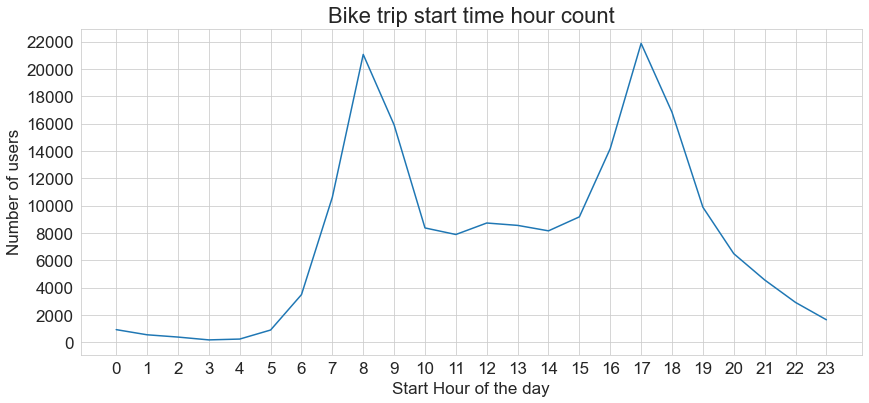

In [8]:
go_bike['start_time'] = pd.to_datetime(go_bike['start_time'])
# create a column for hours
go_bike['start_hour'] = go_bike['start_time'].dt.hour
go_bike[['start_hour']].head()

#form a start hour dataframe
day_hour = pd.DataFrame(go_bike.groupby('start_hour', as_index=False).size())
day_hour.head(2)

#plot a line graph

#change figure size
plt.figure(figsize=(14,6))

hour_lables=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
user_labels=[0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]
sns.set_style('whitegrid')
sns.lineplot(data = day_hour,
            x = 'start_hour',
            y = 'size')
plt.xlabel('Start Hour of the day', fontsize=17)
plt.ylabel('Number of users', fontsize=17)
plt.xticks(hour_lables, fontsize=17)
plt.yticks(user_labels, fontsize=17)
plt.title('Bike trip start time hour count' , fontsize=22)
plt.show();

### When most people end their trips
- Most of the users end their trips at 8AM and 5PM
- Lowest traffic is experienced fom 8PM to 6PM

<Figure size 1008x432 with 0 Axes>

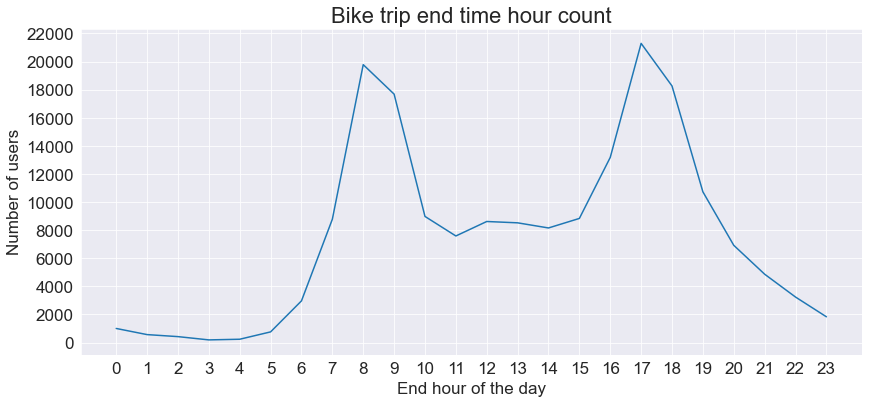

In [9]:
#convert the end_time colum to datetime
go_bike['end_time'] = pd.to_datetime(go_bike['end_time'])

# create a column for hours
go_bike['end_hour'] = go_bike['end_time'].dt.hour
go_bike[['end_hour']].head()

# end hour dataframe
end_hour_df = pd.DataFrame(go_bike.groupby('end_hour', as_index=False).size())
end_hour_df.head(2)

#plot a line greaph to show
#change figure size
plt.figure(figsize=(14,6))

hour_lables=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
user_labels=[0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000]
#change figure size
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.lineplot(data = end_hour_df,
            x = 'end_hour',
            y = 'size')
plt.xlabel('End hour of the day', fontsize=17)
plt.ylabel('Number of users', fontsize=17)
plt.xticks(hour_lables, fontsize=17)
plt.yticks(user_labels, fontsize=17)
plt.title('Bike trip end time hour count' , fontsize=22)
plt.show();

### Most preferred start stations
- The data on the preferred stations can also be used to indicate a number of things. For instance:
    <br>
    - Level of customer service
    <br>
    - Nature of facilities available
    <br>
    - Accessibility
- A look into the these stations can give better insights why these stations are more preferred and use the insights gained to improve the other stations

                                    start_station_name  size
199                               Market St at 10th St  3904
260  San Francisco Caltrain Station 2  (Townsend St...  3544
82                                  Berry St at 4th St  3052
220   Montgomery St BART Station (Market St at 2nd St)  2895
241       Powell St BART Station (Market St at 4th St)  2760
262  San Francisco Ferry Building (Harry Bridges Pl...  2709
259     San Francisco Caltrain (Townsend St at 4th St)  2703
242       Powell St BART Station (Market St at 5th St)  2327
170                              Howard St at Beale St  2293
285                            Steuart St at Market St  2283


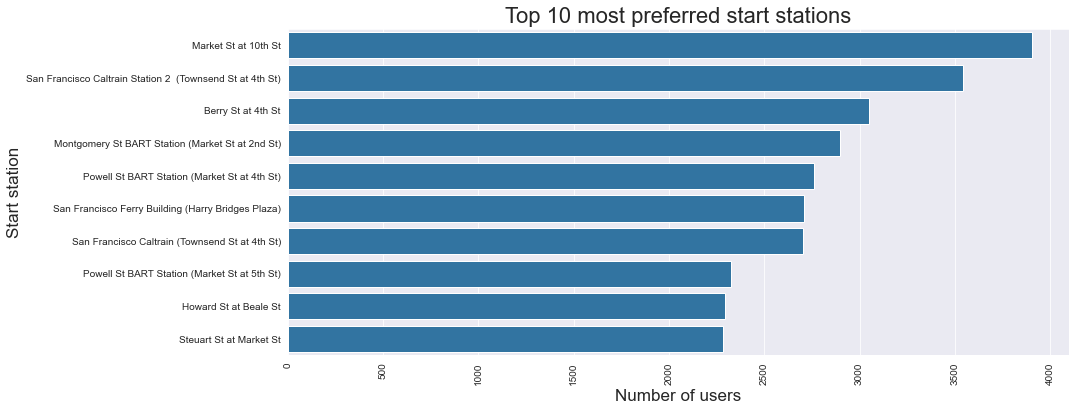

In [10]:
#specify the figure size
plt.figure(figsize = (14,6))
usage = go_bike.groupby('start_station_name', as_index=False).size()
print(usage.sort_values(by='size', ascending = False).head(10))

sns.barplot(data = usage.sort_values(by='size', ascending = False).head(10),
             x = 'size',
            y = 'start_station_name',
             color = base_color)
plt.xlabel('Number of users', fontsize=17)
plt.ylabel('Start station', fontsize=17)
plt.title('Top 10 most preferred start stations', fontsize=22)
plt.xticks(rotation = 90)
plt.show()

### Relationship between trip start hour and trip duration
- Trips that start between 8AM - 4PM generally last longer
- Trips that start between 10 PM to 5 AM last shortest period

C:\Users\HP\AppData\Local\Temp\ipykernel_10296\172708390.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(data = go_bike,
C:\Users\HP\AppData\Local\Temp\ipykernel_10296\172708390.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


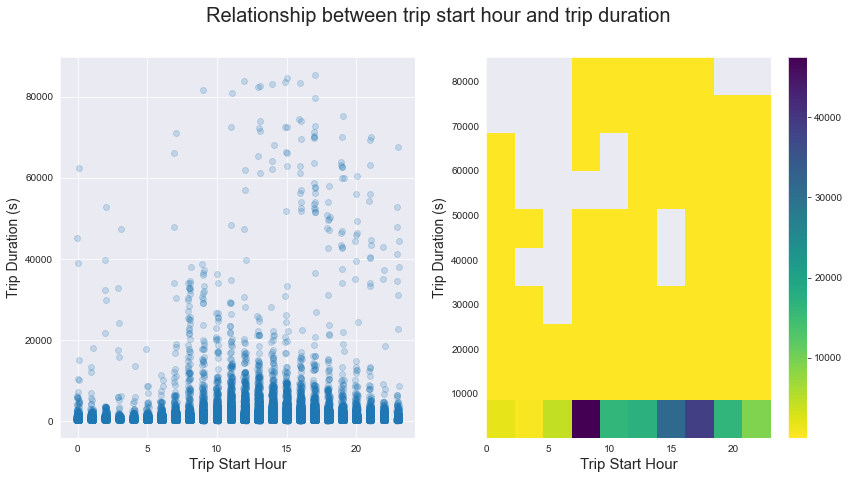

In [11]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.regplot(data = go_bike, 
           x = 'start_hour',
            x_jitter=0.1, 
            scatter_kws={'alpha':0.2},
           y = 'duration_sec', 
           fit_reg=False)
plt.xlabel('Trip Start Hour', fontsize=15)
plt.ylabel('Trip Duration (s)',fontsize=14)
plt.suptitle('Relationship between trip start hour and trip duration', fontsize=20);

plt.subplot(1,2,2)
plt.hist2d(data = go_bike, 
           x = 'start_hour', 
           y = 'duration_sec', 
           cmap = 'viridis_r',  
           cmin = 0.5)
plt.colorbar()
plt.xlabel('Trip Start Hour', fontsize=15)
plt.ylabel('Trip Duration (s)',fontsize=14);


### Relationship between Age and trip duration
- The trip duration decreases with the increase in age
- Highest trip duration is observed for users between the ages of 25 to 45 years

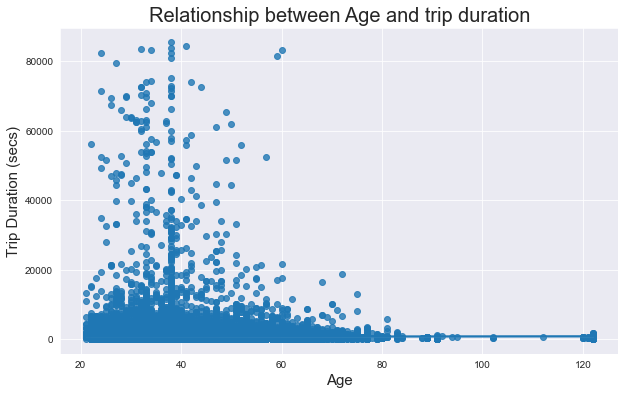

In [24]:
plt.figure(figsize = (10,6))

sns.regplot(data = go_bike, 
            x = 'age', 
            y = 'duration_sec')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Trip Duration (secs)', fontsize = 15)
plt.title('Relationship between Age and trip duration', fontsize = 20)
plt.show()

In [ ]:
!jupyter nbconvert Ford_Go_Bike_Part2.ipynb --to slides --post serve  --no-input --no-prompt